In [12]:
import numpy as np
from qutip import*
import time
import matplotlib.pyplot as plt
import itertools as it
sqrt = np.sqrt
pi   = np.pi
class Add_gate:
    def __init__(gate, name, Tar_Con, angle):
        gate.name    = name
        gate.Tar_Con = Tar_Con
        gate.angle   = angle
                
Nqubits= 1
Nlevels= 3
Paulis_gt = 4.00e-8
CZ_gt = 2.83e-7
gate_time_CCZS = CZ_gt/(sqrt(2))
Diss = [27.35e-6]
Alpha = -2*pi*210e6
ZZ_list = [[0,1]]
ZZ_strength = [0*2*pi*100e3]

In [13]:
def to2levels(dm):
    '''
    This function returns the density matrix in the computational subspace.
    
    Arguments-
    dm          :      Density matrix in the total Hilbert space
    
    Returns-
    Prob_array  :      Array of probabilities in the computational space
    
    '''


    levels= list(map(",".join, it.product(*[map(str, range(Nlevels))])))
    states = ["".join(seq) for seq in it.product(levels, repeat=Nqubits)]
    Prob_array = []
    counter = 0
    for i in states:
        if '2' not in i:
            Prob_array.append(dm[counter, counter])
        counter = counter + 1
    
    Prob_array = np.array(Prob_array)
    norm = 1/np.sum(Prob_array)
    return Prob_array



def project_to_qubit(rho):
    N = int(len(rho.dims[0]))
    projector = Qobj(np.array([[1, 0, 0],[0, 1, 0]]))
    tot_proj = tensor([projector]*N)
    rho_proj = tot_proj*rho*tot_proj.dag()
    return rho_proj.unit()

In [14]:
T1s = [27.35e-6, 39.73e-6, 34.73e-6]
T2s = [45.21e-6, 57.67e-6, 21.49e-6]

Deph = []
for i in range(1):
    _1byT2 = 1/T2s[i]
    _1byT1 = 1/(2*T1s[i])
    Deph.append(1/(_1byT2 - _1byT1))

In [15]:
# Import the developed package
import Chalmers_Simulator_mesolve as CS

In [16]:
# Create Hamiltonian and collapse operators
Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, gate_time_CCZS, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])

In [6]:
gate=[]
gate.append(Add_gate(name=["PY" , "PY"], Tar_Con=[0,1],   angle=[pi/2, pi/2]           ))
gate.append(Add_gate(name=["CZ"       ], Tar_Con=[[0,1]], angle=[0]               ))
gate.append(Add_gate(name=["PY"       ], Tar_Con=[2],     angle=[pi/2]           ))
gate.append(Add_gate(name=["CZ"       ], Tar_Con=[[0,2]], angle=[0]               ))
gate.append(Add_gate(name=["PY" , "PY"], Tar_Con=[1,2],   angle=[-pi/2, -pi/2]           ))
gate.append(Add_gate(name=["PZ"], Tar_Con=[0],   angle=[pi]           ))


Ini = tensor(basis(3,0), basis(3,0), basis(3,0))

fstate = CS.Execute(Hamiltonian, c_ops, gate, Ini)    

Fidelity is 0.9736121283564935


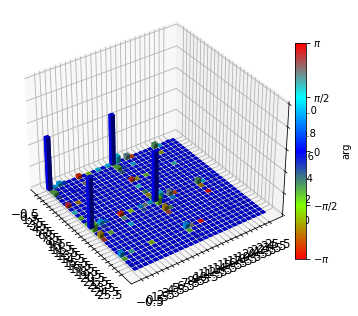

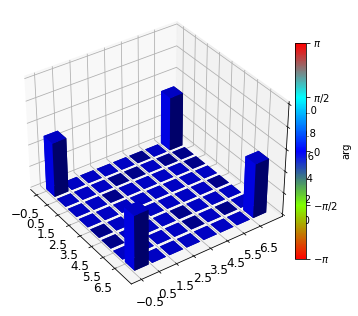

In [7]:
visualization.matrix_histogram_complex(fstate)
GHZ = tensor([basis(2,0)]*3) + tensor([basis(2,1)]*3)
GHZ = GHZ.unit()

rho_GHZ = ket2dm(GHZ)
visualization.matrix_histogram_complex(rho_GHZ)
fstate = project_to_qubit(fstate)
print("Fidelity is", fidelity(fstate, rho_GHZ)**2)

Fidelity is 0.9868650003951972


(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x2371ecf1250>)

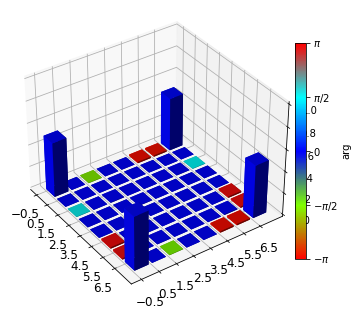

In [8]:
# Using 3 qubit gate
gate=[]
gate.append(Add_gate(name=["HD", "PX"], Tar_Con=[0, 1],      angle=[pi/2, pi]              ))
gate.append(Add_gate(name=["CCZS"    ], Tar_Con=[[0,1,2,0]], angle=[0]        ))
gate.append(Add_gate(name=["PX"      ], Tar_Con=[1],         angle=[pi]           ))

Ini = tensor(basis(3,0), basis(3,0), basis(3,0)).unit()

fstate = CS.Execute(Hamiltonian, c_ops , gate, Ini) 
fstate = project_to_qubit(fstate)
print("Fidelity is", fidelity(fstate, rho_GHZ)**2)
visualization.matrix_histogram_complex(fstate)

In [17]:
gate=[]
gate.append(Add_gate(name=["PX"], Tar_Con=[0],   angle=[pi]           ))
Ini = tensor(basis(3,0))
fstate = CS.Execute(Hamiltonian, [], gate, Ini)    

In [19]:
fstate*fstate.dag()

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 6.65282666e-04+0.00000000e+00j -2.57217091e-02+1.79822386e-03j
   1.16889197e-05-8.58993617e-07j]
 [-2.57217091e-02-1.79822386e-03j  9.99334511e-01+0.00000000e+00j
  -4.54248504e-04+1.61659032e-06j]
 [ 1.16889197e-05+8.58993617e-07j -4.54248504e-04-1.61659032e-06j
   2.06481728e-07+0.00000000e+00j]]